In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import newton
import math
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

# Comparación de Ordenes de Convergencia


## Introducción

En métodos numéricos, es fundamental entender cómo un método iterativo se aproxima a la solución exacta de un problema. El **orden de convergencia** proporciona una medida de qué tan rápido una secuencia converge a su límite. En este notebook, exploraremos el concepto de orden de convergencia, su definición formal y algunos ejemplos ilustrativos.

---

## Recordemos:

Al inicio del curso vimos metodos para buscar la raíz de $f$, es decir, la solución de

$$
f(x) = 0.
$$

**Iteración:** definimos la secuencia $x_n$ usando el mapeo $g : x_n \rightarrow x_{n+1}$. El mapeo está diseñado de manera que los puntos fijos de $g$ son raíces de $f$. Si la secuencia converge, hemos encontrado una raíz.

Para un mapeo contractivo con constante de Lipschitz $L < 1$, el mapeo converge, con error

$$
|e_n| \leq \frac{L^n}{1 - L} |x_1 - x_0|.
$$

El error depende del peor caso del valor de \\(L\\) en todo el intervalo. A menudo se encuentra una convergencia más rápida para mejores aproximaciones iniciales.


## Definición del Orden de Convergencia

Sea $(x_n)$ una secuencia que converge a $(x^*)$. Se dice que la secuencia converge a $(x^*)$ con orden de convergencia $(p)$ si existe una constante positiva $(C)$ tal que:

$$
\lim_{n \to \infty} \frac{|x_{n+1} - x^*|}{|x_n - x^*|^p} = C
$$

- **Orden lineal (p = 1):** La secuencia converge linealmente si el error en cada iteración es proporcional al error en la iteración previa.
- **Orden cuadrático (p = 2):** La secuencia converge cuadráticamente si el error se reduce proporcional al cuadrado del error anterior.

---

## Análisis Teórico

El orden de convergencia es útil para comparar la eficiencia de diferentes métodos numéricos. Un orden más alto generalmente implica una convergencia más rápida hacia la solución exacta.

La velocidad de convergencia dependa del mapa $g$ cerca de la raíz $s$. Esto puede demostrarse para un $g$ “adecuado” y un $x_n$ “bueno”.

Definimos el error en la etapa $n^{\text{th}}$

$$e_n = x_n - s.$$

Como $s$ es un punto fijo de $g$, use la expansión de Taylor de $e_{n+1}$:

$$\begin{aligned}
        e_{n+1} = x_{n+1} - s & = g(x_n) - g(s) \\
        & = g'(s) (x_n - s) + \tfrac{1}{2!} g''(s) (x_n - s)^2 + \dots \\
        & = g'(s) e_n + \tfrac{1}{2!} g''(s) e_n^2 + \dots
 \end{aligned}$$

Si el error es pequeño, un método *lineal* o de *primer orden* converge como

$$e_{n+1} \sim g'(s) e_n;$$

disminuye una cantidad constante en cada paso, proporcional a la derivada del mapa en la raíz.

Si $g'(s) \equiv 0$ y el error es pequeño, un mapa *cuadrático* o de *segundo orden* converge como

$$e_{n+1} \sim g''(s) e_n^2.$$

Cuantas más derivadas de $g$ se anulen en la raíz, más rápida será la convergencia (pero mejor debe ser la estimación inicial).

---

## Marco General

Como es habitual, estamos intentando resolver

$$f(x) = 0$$

para $x \in [a, b]$. La iteración funcional es el mapa

$$g(x) = x - f(x);$$

en los puntos fijos de este mapa, $f(x)$ debe anularse.

Generalización simple: introduzca $\varphi(x) \neq 0$, entonces

$$g(x) = x - \varphi(x) f(x)$$

también cumple que $g(s) = s \, \implies \, f(s) = 0 \, \implies$ raíz.

Se puede aumentar la velocidad de convergencia eligiendo $\varphi$, siempre que

$$0 < \varphi(x) < \infty, \quad x \in [a, b].$$

## Métodos de Cuerdas

La elección más simple es: $\varphi(x) = m \neq 0$, lo que da

$$g(x) = x - m f(x).$$

Esto se conoce como el **método de la cuerda**.

Se es libre de elegir $m$, siempre que $g$ sea un mapeo contractivo en $[a, b]$. Esto requiere que $|g'(x)| < 1$ en el intervalo, lo que implica:

$$|1 - m f'(x)| < 1 \quad \forall x \in [a, b].$$

Esto se traduce en la condición:

$$0 < m f'(x) < 2 \quad \forall x \in [a, b].$$

Si $m = \frac{1}{f'(s)}$, entonces el método converge cuadráticamente.

### Graficamente

La imagen geométrica habitual muestra el movimiento sobre líneas horizontales y verticales desde el mapa hasta la línea $y = x$ y los ejes.

En la imagen geométrica del **método de la cuerda**, el movimiento ocurre sobre líneas de pendiente constante $1/m$ desde el mapa hacia el eje para encontrar el siguiente $x_n$.


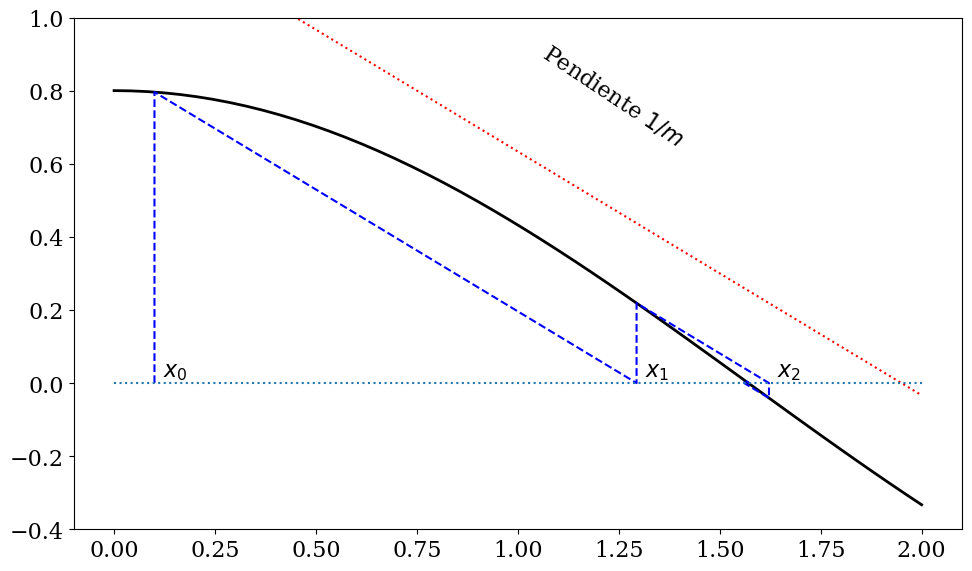

In [28]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
m = -0.75 * 2.0 # Max value of derivative will be 0.8: reduce to 0.75 for safety factor
def g_sketch(x, m):
    return x - m * 0.8 * np.cos(x)
iters = 0.1 * np.ones((5,))
for n in range(4):
    iters[n+1] = g_sketch(iters[n], m)
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

x_slope = np.array([0.0, 2.0])
y_slope = 1.3 + x_slope / m

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
ax.plot(np.repeat(iters, 2), plot_results, 'b--')
ax.plot(x_slope, y_slope, 'r:')
ax.hlines(0.0, 0.0, 2.0, linestyles=':')
ax.text(1.05, 1.35 + 1.05 / m, r"Pendiente $1/m$", rotation = 180.0 / np.pi * math.atan(1.0/m))
for i in range(3):
    label_text = r"$x_{}$".format(i)
    ax.text(iters[i]+0.02, 0.02, label_text)
ax.set_ybound(-0.4, 1.0)
fig.tight_layout()
plt.show()

### Ejemplo

Consideramos la función

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

El método de la cuerda genérico tiene el mapa

$$g(x) = x (1 - m) + m \cos(x),$$

y el rango de valores permitidos para $m$ es

$$0 < |m + m \sin(x)| < 2,$$

lo que implica $0 < |m| < 2$ y $0 < |1.8415 m| < 2$. Eligiendo $m = 1.08 \, (\lesssim 2 / 1.8415)$ obtenemos el mapa de iteración

$$x_{n+1} = -0.08 x_n + 1.08 \cos(x_n).$$

La secuencia producida por el mapa

$$x_{n+1} = -0.08 x_n + 1.08 \cos(x_n)$$

empezando en cero es

$$\begin{aligned}
            x_0 & = 0 \\
            x_1 & =    1.0800 \\
            x_2 & =    0.4226 \\
            x_3 & =    0.9512 \\
            x_4 & =    0.5511 \\
            x_5 & = 0.8760
          \end{aligned}$$

que converge linealmente a la solución $s = 0.739085\dots$.

In [32]:
def chord_method(f, x0, m, n_iterations = 100):
    """Chord method"""
    def g(x):
        return x - m * f(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])

    return iters

def f1(x):
    return x - np.cos(x)

result1 = chord_method(f1, 0.0, 1.08)

for i in range(50):
    print("Result after {} iterations is {:6f}".format(i, result1[i]))

Result after 0 iterations is 0.000000
Result after 1 iterations is 1.080000
Result after 2 iterations is 0.422635
Result after 3 iterations is 0.951162
Result after 4 iterations is 0.551104
Result after 5 iterations is 0.876014
Result after 6 iterations is 0.621354
Result after 7 iterations is 0.828430
Result after 8 iterations is 0.663842
Result after 9 iterations is 0.797534
Result after 10 iterations is 0.690549
Result after 11 iterations is 0.777324
Result after 12 iterations is 0.707630
Result after 13 iterations is 0.764086
Result after 14 iterations is 0.718649
Result after 15 iterations is 0.755420
Result after 16 iterations is 0.725789
Result after 17 iterations is 0.749751
Result after 18 iterations is 0.730427
Result after 19 iterations is 0.746046
Result after 20 iterations is 0.733445
Result after 21 iterations is 0.743627
Result after 22 iterations is 0.735409
Result after 23 iterations is 0.742048
Result after 24 iterations is 0.736689
Result after 25 iterations is 0.741

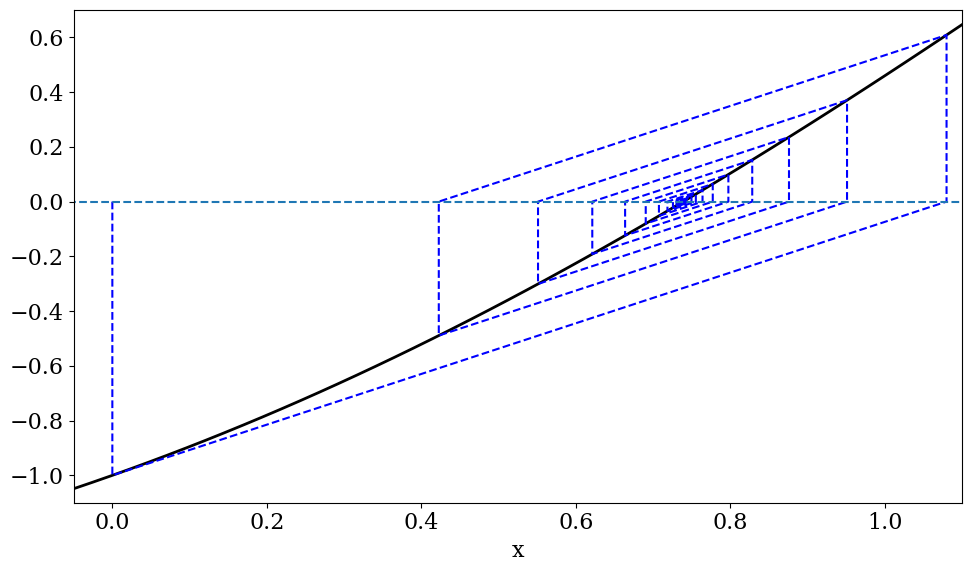

In [33]:
x = np.linspace(-0.1, 1.1)
f1x = f1(x)
plot_results = np.empty((2*result1.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

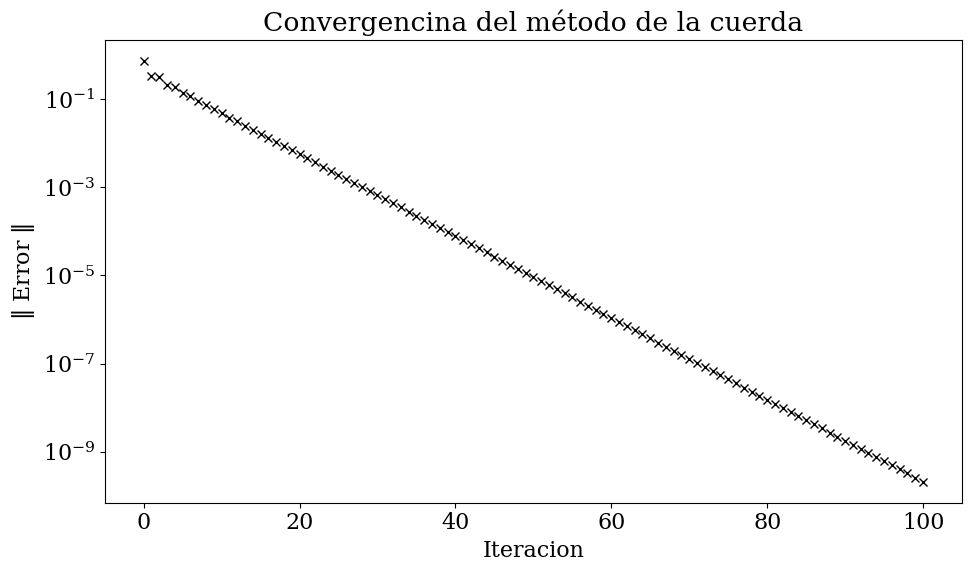

In [35]:
x_exact = newton(f1, 0.7)
chord_error = np.abs(result1 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(chord_error)), chord_error, 'kx')
ax.set_xlabel('Iteracion')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title('Convergencina del método de la cuerda')
fig.tight_layout()
plt.show()

### Método de Newton

El método de Newton-Raphson es un ejemplo clásico que exhibe convergencia cuadrática. Para la convergencia cuadrática se necesita que $g'(s) \equiv 0$. El método de Newton se obtiene eligiendo

$$\varphi(x) = \frac{1}{f'(x)} \quad \implies \quad g(x) = x - \frac{f(x)}{f'(x)}.$$

Una comprobación sencilla muestra que

$$g'(s) = 1 - 1 + \frac{f(s) f''(s)}{\left( f'(s) \right)^2} = 0.$$

El esquema de iteración es

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)};$$

es más complejo y tiene algunas limitaciones:

-   Requiere la derivada. Si esta es desconocida, es mejor usar el método de la secante.

-   Si la derivada se anula en la raíz, el cálculo de la velocidad de convergencia es incorrecto. Esto es un problema para raíces múltiples, en cuyo caso el método de Newton converge, en el mejor de los casos, linealmente.

#### Geometricamente

La representación geométrica del **método de Newton** muestra el movimiento sobre líneas con pendiente dada por la derivada en $x_n$.


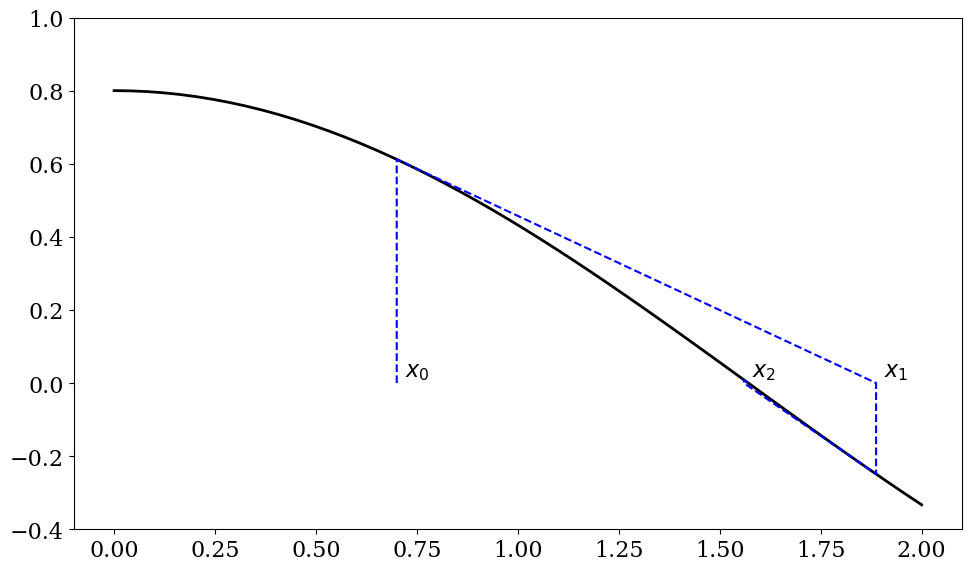

In [36]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
def g_sketch(x):
    return x + np.cos(x) / np.sin(x)
iters = 0.7*np.ones((5,))
for n in range(4):
    iters[n+1] = g_sketch(iters[n])
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
ax.plot(np.repeat(iters, 2), plot_results, 'b--')
for i in range(3):
    label_text = r"$x_{}$".format(i)
    ax.text(iters[i]+0.02, 0.02, label_text)
ax.set_ybound(-0.4, 1.0)
fig.tight_layout()
plt.show()

#### Ejemplo

Volvemos a considerar

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

El método de Newton tiene el mapa

$$\begin{aligned}
    g(x) & = x - \frac{f(x)}{f'(x)} \\
    & = \frac{x \sin(x) + \cos(x)}{1 + \sin(x)}.
  \end{aligned}$$

Como $f'(x) \neq 0$ en el dominio, se espera convergencia cuadrática.

La secuencia producida por el mapa

$$x_{n+1} = \frac{x_n \sin(x_n) + \cos(x_n)}{1 + \sin(x_n)},$$

empezando en cero es

$$\begin{aligned}
            x_0 & = 0.0000000000 \\
            x_1 & = 1.0000000000 \\
            x_2 & = 0.7503638678 \\
            x_3 & = 0.7391128909 \\
            x_4 & = 0.7390851334 \\
            x_5 & = 0.7390851332
          \end{aligned}$$

que converge cuadráticamente a la solución $s = 0.739085\dots$.

In [18]:
def newton_method(f, df, x0, n_iterations = 10):
    """Newton's method"""
    def g(x):
        return x - f(x) / df(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])

    return iters

def df1(x):
    return 1.0 + np.sin(x)

result2 = newton_method(f1, df1, 0.0)

for i in range(6):
    print("Result after {} iterations is {:10f}".format(i, result2[i]))

Result after 0 iterations is   0.000000
Result after 1 iterations is   1.000000
Result after 2 iterations is   0.750364
Result after 3 iterations is   0.739113
Result after 4 iterations is   0.739085
Result after 5 iterations is   0.739085


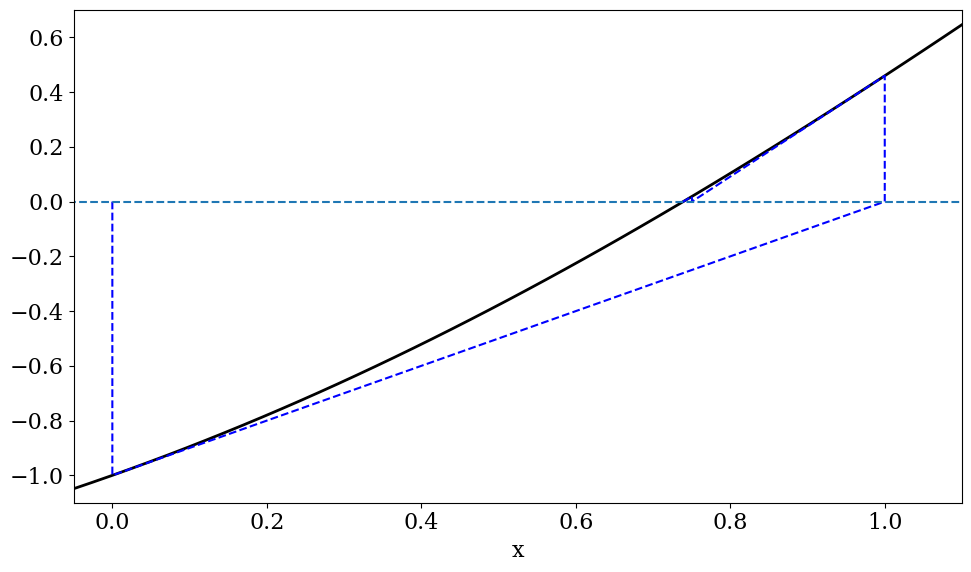

In [37]:
plot_results = np.empty((2*result2.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result2)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result2,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

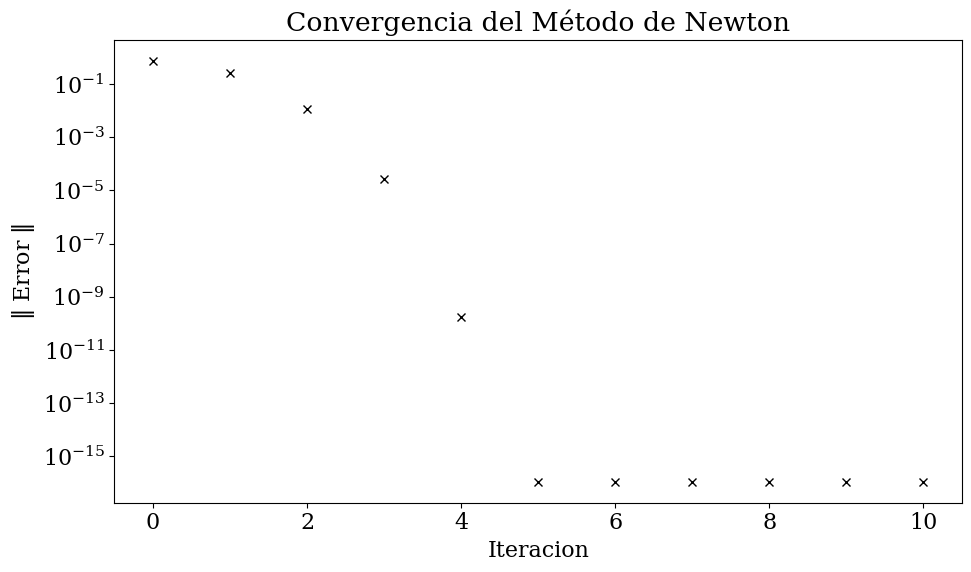

In [38]:
x_exact = newton(f1, 0.7) # Note that the "exact" solution comes from a library function called newton, which here is not
                          # actually using Newton's method as given here (we haven't provided the derivative!)
newton_error = np.abs(result2 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(newton_error)), newton_error, 'kx')
ax.set_xlabel('Iteracion')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergencia del Método de Newton")
fig.tight_layout()
plt.show()

### Método de la Secante

Una desventaja clave del método de Newton es que requiere la derivada $f'(x)$. Evaluaciones adicionales de la función aumentan el costo, incluso cuando la derivada puede calcularse. En su lugar, el **método de la secante** aproxima la derivada usando

$$f'(x_n) \simeq \frac{f \left( x_n \right) - f \left( x_{n-1} \right)}{x_n - x_{n-1}} .$$

Esto resulta en el esquema de iteración

$$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}.$$

Este método no se ajusta al marco usual: utiliza *dos* valores previos en la secuencia. Esto implica que se requieren dos estimaciones iniciales, y los teoremas de mapeo contractivo no pueden aplicarse. Sin embargo, se puede demostrar que el método converge; a menudo es más útil y más rápido que el método de Newton.

#### Graficamente

La representación geométrica del **método de la secante** muestra el movimiento sobre líneas cuya pendiente está determinada por la secante a la función que pasa por $x_{n-1}$ y $x_n$.



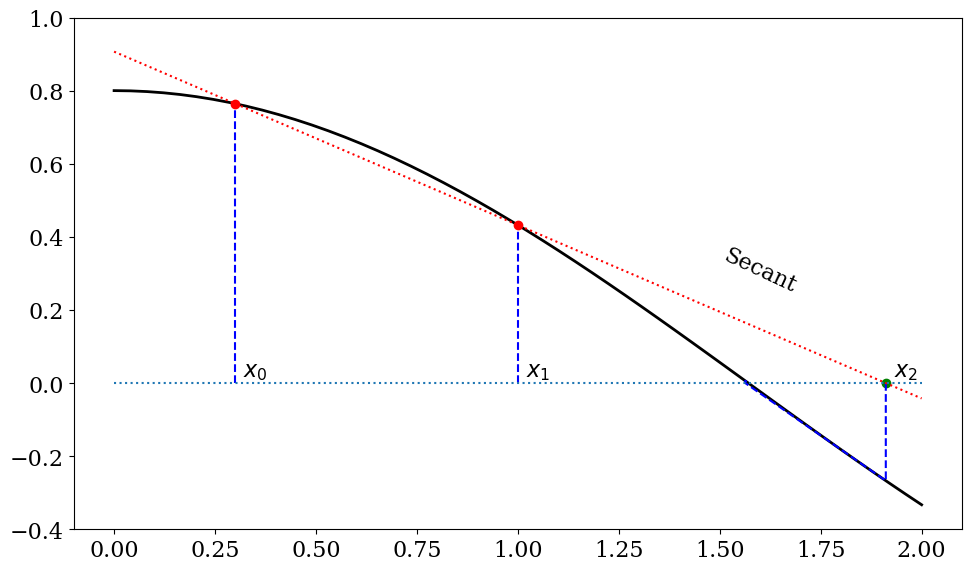

In [39]:
x_sketch = np.linspace(0.0, 2.0)
y_sketch = 0.8 * np.cos(x_sketch)
iters = 0.3 * np.ones((5,))
iters[1] = 1.0
for n in range(1, 4):
    iters[n+1] = iters[n] - np.cos(iters[n]) * (iters[n] - iters[n-1]) / (np.cos(iters[n]) - np.cos(iters[n-1]))
plot_results = np.empty((2*iters.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = 0.8 * np.cos(iters)

x_slope = np.array([0.0, 2.0])
y_slope = 0.8*np.cos(0.3) + (x_slope - 0.3) / 0.7 * 0.8 * (np.cos(1.0) - np.cos(0.3))

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x_sketch, y_sketch, 'k-', linewidth = 2)
ax.plot(np.repeat(iters[0], 2), plot_results[0:2], 'b--')
ax.plot(np.repeat(iters[1], 2), plot_results[2:4], 'b--')
ax.plot(iters[0], plot_results[1], 'ro')
ax.plot(iters[1], plot_results[3], 'ro')
ax.plot(iters[2], plot_results[4], 'go')
ax.plot(np.repeat(iters[2:], 2), plot_results[4:], 'b--')
ax.plot(x_slope, y_slope, 'r:')
ax.hlines(0.0, 0.0, 2.0, linestyles=':')
ax.text(1.5, 0.25, r"Secant", rotation = -25)
for i in range(3):
    label_text = r"$x_{}$".format(i)
    ax.text(iters[i]+0.02, 0.02, label_text)
ax.set_ybound(-0.4, 1.0)
fig.tight_layout()
plt.show()

#### Ejemplo 

Volvemos a considerar

$$f(x) = x - \cos(x), \quad x \in [0, 1].$$

El **método de la secante** tiene el siguiente esquema de iteración (no hay mapa):

$$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}.$$

Se espera una convergencia ligeramente más lenta que la del método de Newton.

La secuencia se genera utilizando la iteración

$$x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})},$$

empezando con $x_0 = 0$ y $x_1 = 1$:

$$\begin{aligned}
            x_0 & = 0.0000000000 \\
            x_1 & = 1.0000000000 \\
            x_2 & = 0.6850733573 \\
            x_3 & = 0.7362989976 \\
            x_4 & = 0.7391193619 \\
            x_5 & = 0.7390851121
          \end{aligned}$$

Esta secuencia converge a la solución $s = 0.739085\dots$.

In [43]:
def secant_method(f, x0, x1, n_iterations = 10):
    """ Secant method"""
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    iters[1] = x1
    for n in range(1, n_iterations):
        iters[n+1] = iters[n] - f(iters[n]) * (iters[n] - iters[n-1]) / (f(iters[n]) - f(iters[n-1]))

    return iters

result3 = secant_method(f1, 0.0, 1.0)

for i in range(9):
    print("Result after {} iterations is {:10f}".format(i, result3[i]))

Result after 0 iterations is   0.000000
Result after 1 iterations is   1.000000
Result after 2 iterations is   0.685073
Result after 3 iterations is   0.736299
Result after 4 iterations is   0.739119
Result after 5 iterations is   0.739085
Result after 6 iterations is   0.739085
Result after 7 iterations is   0.739085
Result after 8 iterations is   0.739085


/var/folders/37/v9fb2sws5m7gs68kvlhg8tg40000gn/T/ipykernel_48528/1354758642.py:7: RuntimeWarning: invalid value encountered in scalar divide
  iters[n+1] = iters[n] - f(iters[n]) * (iters[n] - iters[n-1]) / (f(iters[n]) - f(iters[n-1]))


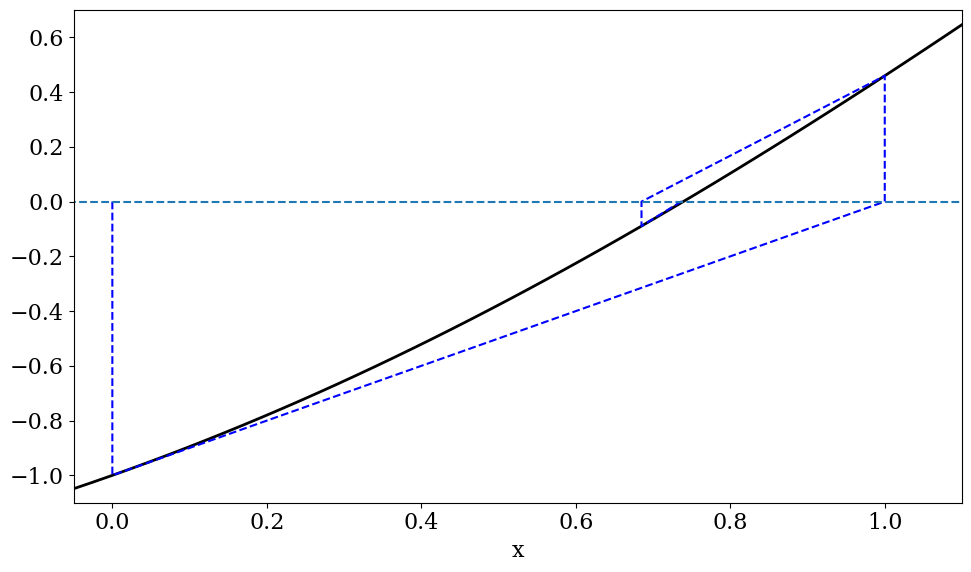

In [25]:
plot_results = np.empty((2*result3.size,))
plot_results[0::2] = 0.0
plot_results[1::2] = f1(result3)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, f1x, 'k-', linewidth = 2)
ax.plot(np.repeat(result3,2), plot_results, 'b--')
ax.hlines(0.0, -0.1, 1.1, linestyle='--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.1)
ax.set_ybound(-1.1, 0.7)
fig.tight_layout()
plt.show()

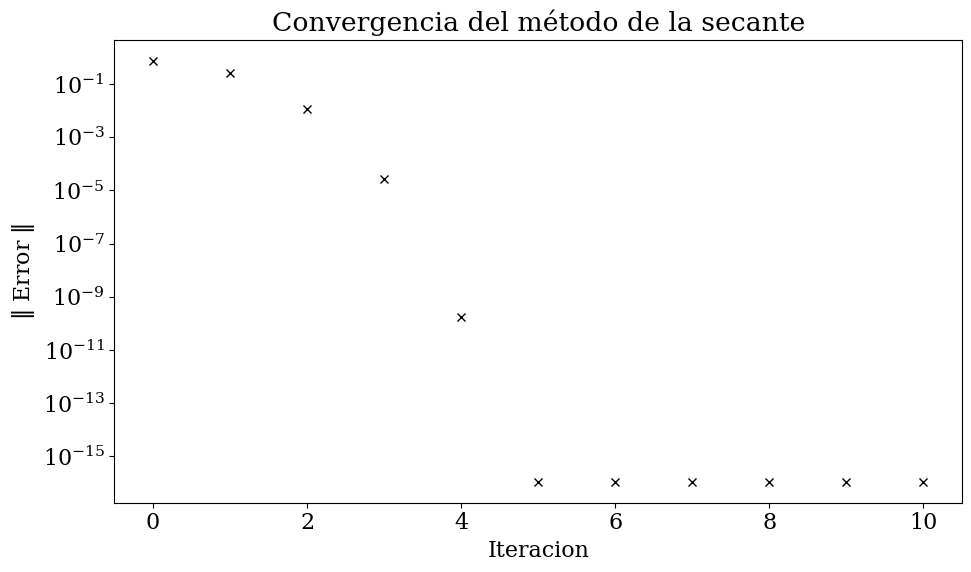

In [44]:
secant_error = np.abs(result3 - x_exact)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(secant_error)), newton_error, 'kx')
ax.set_xlabel('Iteracion')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergencia del método de la secante")
fig.tight_layout()
plt.show()